In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
tensor = torch.tensor([1,2,3])

print(tensor, tensor.device)

tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

In [4]:
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [5]:
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [ ]:
if torch.cuda

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhirajnirne/california-housing-data")

print("Path to dataset files:", path)

100%|██████████| 400k/400k [00:00<00:00, 18.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dhirajnirne/california-housing-data/versions/1


In [2]:
!pip install torchview

In [3]:
!pip install torchinfo

In [4]:
from ast import increment_lineno
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from torchinfo import summary
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [7]:
import os

full_path = os.path.join(path, 'housing.csv')
df = pd.read_csv(full_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df[df.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [11]:
df.dropna(inplace=True)
df.shape

(20433, 10)

In [12]:
df.median_house_value.describe()

,median_house_value
count,20433.000000
mean,206864.413155
std,115435.667099
min,14999.000000
25%,119500.000000
50%,179700.000000
75%,264700.000000
max,500001.000000


<Axes: ylabel='Density'>

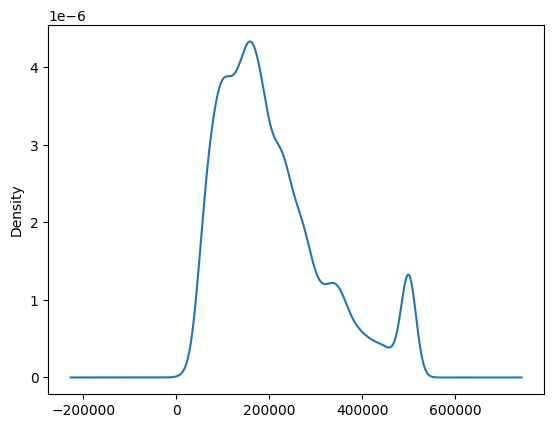

In [13]:
df.median_house_value.plot(kind='kde')